## Analyzing general socioeconomics and its relation to student performances

### Based on results, infer ideas and concepts that influence student scores

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
print(df.shape) #size of data

df.describe() #statistics on numeric data of dataframe

(1000, 8)


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Given the summary above, let's say that the passing mark of the exam is 55. 

In [4]:
passMark = 55

In [5]:
df['Passed_Math'] = np.where(df['math score'] < passMark, 'F', 'P')
df['Passed_Reading'] = np.where(df['reading score'] < passMark, 'F', 'P')
df['Passed_Writing'] = np.where(df['writing score'] < passMark, 'F', 'P')

In [6]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Passed_Math,Passed_Reading,Passed_Writing
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F
4,male,group C,some college,standard,none,76,78,75,P,P,P
5,female,group B,associate's degree,standard,none,71,83,78,P,P,P
6,female,group B,some college,standard,completed,88,95,92,P,P,P
7,male,group B,some college,free/reduced,none,40,43,39,F,F,F
8,male,group D,high school,free/reduced,completed,64,64,67,P,P,P
9,female,group B,high school,free/reduced,none,38,60,50,F,P,F


#### Students Pass-Fail Math scores

In [7]:
percentMath = (df['Passed_Math']=='P').sum() / (len(df.index))
print('Math Score: %.2f%%' % (percentMath*100))

df.Passed_Math.value_counts()

Math Score: 77.90%


P    779
F    221
Name: Passed_Math, dtype: int64

#### Students Pass-Fail Reading scores

In [8]:
percentReading = (df['Passed_Reading']=='P').sum() / (len(df.index))
print('Reading Score: %.2f%%' % (percentReading*100))

df.Passed_Reading.value_counts()

Reading Score: 84.00%


P    840
F    160
Name: Passed_Reading, dtype: int64

#### Students Pass-Fail Writing scores

In [9]:
percentWriting = (df['Passed_Writing']=='P').sum() / len(df.index)
print('Writing Score: %.2f%%' % (percentWriting*100))

df.Passed_Writing.value_counts()

Writing Score: 79.70%


P    797
F    203
Name: Passed_Writing, dtype: int64

#### Considering that most institution's passing rates among classes is around 80%, the scores of the students reflect an average ratio of pass/fail

#### An indicator of good academic standing for a student is passing all classes. Retrieve stats of students whose scores all passed

In [10]:
df['All_Pass_Status'] = df.apply(lambda x: 'P' if x.Passed_Math == 'P' and x.Passed_Reading == 'P' and x.Passed_Writing == 'P' else 'F', axis=1)

In [11]:
percentStudentsPassed = (df['All_Pass_Status']=='P').sum() / len(df.index)
print("All Class Passed Percentage: %.2f%%" % (percentStudentsPassed*100))
df.All_Pass_Status.value_counts()

All Class Passed Percentage: 70.60%


P    706
F    294
Name: All_Pass_Status, dtype: int64

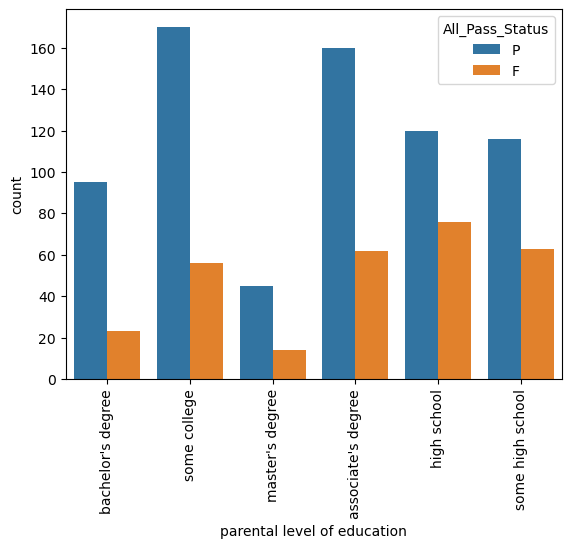

In [12]:
import seaborn as sns

graphA = sns.countplot(x='parental level of education', data=df, hue="All_Pass_Status")
_ = plt.setp(graphA.get_xticklabels(), rotation=90)

In [13]:
#ratio of parents with high school as highest education level
highSchool_count = (df['parental level of education']=='high school').sum()
highSchool_ratio = highSchool_count  / len(df.index)

#ratio of parents with unfinished high school
someHighSchool_count = (df['parental level of education']=='some high school').sum()
someHighSchool_ratio= someHighSchool_count / len(df.index)

pass_array = np.where((df['parental level of education']=='high school') & (df['All_Pass_Status']=='P'), True, False)
pass_ratio = np.count_nonzero(pass_array == True) / highSchool_count
print('Students passed percentage whose parents finished high school: %.2f%%' % (pass_ratio*100))

Students passed percentage whose parents finished high school: 61.22%


In [14]:
pass_array = np.where((df['parental level of education']=='some high school') & (df['All_Pass_Status']=='P'), True, False)
pass_ratio = np.count_nonzero(pass_array == True) / someHighSchool_count
print('Students passed percentage whose parents finished some high school: %.2f%%' % (pass_ratio*100))

Students passed percentage whose parents finished some high school: 64.80%


#### Students whose parents finished high school had a score failure rate of 48.78%. For students whose parents only finished some high school, the score failure rate was 45.20%.

In [15]:
bachelor_count = (df['parental level of education'] == 'bachelor\'s degree').sum()
pass_array = np.where(((df['parental level of education'] == 'bachelor\'s degree') & (df['All_Pass_Status']=='P')), True, False)
pass_ratio = np.count_nonzero(pass_array == True) / bachelor_count
print('Students passed with parents with bachelor\'s degree: %.2f%%' % (pass_ratio*100))

Students passed with parents with bachelor's degree: 80.51%


In [16]:
associate_count = (df['parental level of education']=='associate\'s degree').sum()
pass_array = np.where(((df['parental level of education']=='associate\'s degree') & (df['All_Pass_Status']=='P')), True, False)
pass_ratio = np.count_nonzero(pass_array == True) / associate_count
print('Students passed with parents with associate\'s degree: %.2f%%' % (pass_ratio*100))

Students passed with parents with associate's degree: 72.07%


#### For students whose parents who finished with college (AS, BS), the passing rate significantly increased. For instance, students whose parents finished a bachelors degree had a 19.22% increase from the rate of students whose parents only finished high school. From a sociological viewpoint, the impact of a college degree correlates to the success of an individual in academic scores.

In [28]:
df['Two_Class_Pass'] = df.apply(lambda x: 'T' if (x.Passed_Math == 'P' and x.Passed_Reading == 'P') 
                        or (x.Passed_Math == 'P' and x.Passed_Writing == 'P') 
                        or (x.Passed_Reading == 'P' and x.Passed_Writing == 'P') else 'F', axis=1)

df['average of all scores'] = df.apply(lambda x: round((x['math score']+x['reading score']+x['writing score'])/3, 2), axis=1)

df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Passed_Math,Passed_Reading,Passed_Writing,All_Pass_Status,Two_Class_Pass,average of all scores
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,T,72.67
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,T,82.33
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,T,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,F,F,49.33
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,T,76.33


#### Let's consider a good academic standing where two classes passed AND at least 55 is the average of all scores is the benchmark.

In [31]:
percent_passed = (df['Two_Class_Pass']=='T').sum() / len(df.index)
print('Two Classes Passed Percentage: %.2f%%' % (percent_passed*100))
df['Two_Class_Pass'].value_counts()

Two Classes Passed Percentage: 82.30%


T    823
F    177
Name: Two_Class_Pass, dtype: int64

In [33]:
pass_average_count = (df['average of all scores'] >= 55).sum()
print("Students with passing average of all scores: %d" % (pass_average_co))

809
